# Import dependencies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Loading dataset

In [2]:
from sklearn.datasets import load_wine

In [3]:
df = load_wine()

### Import models

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score

In [6]:
X, y = df.data, df.target

In [10]:

clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=3)
cv = cross_val_score(clf, X, y, cv=5)
print(f'Decision tree scores: {cv}, (avg: {np.mean(cv)})')

clf = BaggingClassifier(n_estimators=10, random_state=1)
cv = cross_val_score(clf, X, y, cv=5)
print(f'Bagging scores: {cv}, (avg: {np.mean(cv)})')

clf = AdaBoostClassifier(n_estimators=100, random_state=1, algorithm='SAMME')
cv = cross_val_score(clf, X, y, cv=5)
print(f'AdaBoost scores: {cv}, (avg: {np.mean(cv)})')

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, subsample=0.5, random_state=1, min_samples_leaf=3)
cv = cross_val_score(clf, X, y, cv=5)
print(f'Gradient boosting scores: {cv}, (avg: {np.mean(cv)})')

Decision tree scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857], (avg: 0.8882539682539681)
Bagging scores: [0.91666667 0.94444444 0.88888889 0.97142857 1.        ], (avg: 0.9442857142857143)
AdaBoost scores: [0.83333333 0.88888889 0.91666667 1.         1.        ], (avg: 0.9277777777777778)
Gradient boosting scores: [0.94444444 0.94444444 0.97222222 0.97142857 1.        ], (avg: 0.9665079365079364)


Text(0, 0.5, 'OOB loss')

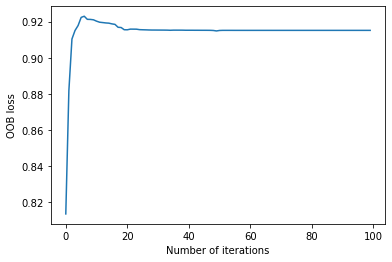

In [11]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, subsample=0.5, random_state=1, min_samples_leaf=3).fit(X,y)
oob = np.cumsum(clf.oob_improvement_)
plt.plot(oob)
plt.xlabel('Number of iterations')
plt.ylabel('OOB loss')